In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()

In [4]:
# Convert to DataFrame for better manipulation
df = pd.DataFrame(data.data, columns=data.feature_names)

In [5]:
# Target labels
target = data.target

In [7]:
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
# Standardizing the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [9]:
# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 components
df_pca = pca.fit_transform(df_scaled)

# Get the explained variance
explained_variance = pca.explained_variance_ratio_
print(f'Explained Variance: {explained_variance}')


Explained Variance: [0.44272026 0.18971182]


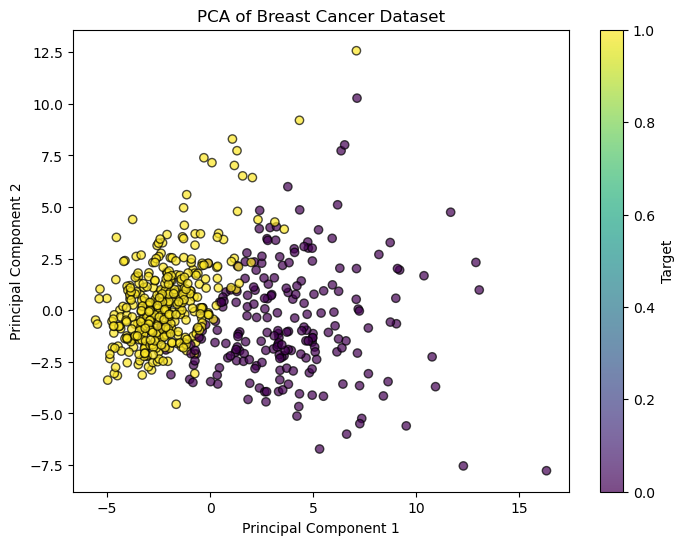

In [10]:
# Create a scatter plot of the first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=target, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Target')
plt.show()

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_pca, target, test_size=0.3, random_state=42)

In [13]:
# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        63
           1       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

